In [174]:
from __future__ import print_function, division
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score, explained_variance_score, mean_absolute_error, mean_squared_error, adjusted_rand_score
from sklearn.model_selection import train_test_split, KFold, cross_val_predict
from sklearn.linear_model import LinearRegression, Lasso, LassoCV
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,ExtraTreesRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVR
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from ipywidgets import FloatProgress
from IPython.display import display
%matplotlib inline

In [175]:
def fit_scatter(y_true, y_pred):
    assert y_true.shape == y_pred.shape
    fig, ax = plt.subplots()
    ax.scatter(y_true, y_pred)
    ax.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'k--', lw=4)
    ax.set_xlabel('Observed AUC')
    ax.set_ylabel('Predicted AUC')
    ax.set_title('')

In [176]:
def print_stats(true,predictions):
    print('Coefficient of determination R^2: {}'.format(r2_score(true, predictions)))
    print('Mean squared error:               {}'.format(mean_squared_error(true, predictions)))
    print('Mean absolute error:              {}'.format(mean_absolute_error(true, predictions)))
    print('Root mean squared error:          {}'.format(np.sqrt(mean_squared_error(true, predictions))))
    print('Correlation Coefficient:          {}'.format(np.corrcoef(true, predictions)[0][1]))

In [185]:
def get_best_settings(results_1,results_2):
    best_result_1 = results_1[0][0][0]
    best_result_2 = results_2[0][0][0]
    best_difference = results_2[0][0][0] - results_1[0][0][0]

    best_i_1=0
    best_j_1=0
    best_k_1=0

    best_i_2=0
    best_j_2=0
    best_k_2=0

    best_i_3=0
    best_j_3=0
    best_k_3=0
    
    a = [0.00005,0.0001,0.0003,0.0005,0.0008,0.001,0.005]
    ft = [True,False]
    norm = [True,False]
    
    for i in range(len(a)):
        for j in range(len(ft)):
            for k in range(len(norm)):
                if best_result_1 < results_1[i][j][k]:
                    best_result_1 = results_1[i][j][k]
                    best_i_1=i
                    best_j_1=j
                    best_k_1=k
                if best_result_2 < results_2[i][j][k]:
                    best_result_2 = results_2[i][j][k]
                    best_i_2=i
                    best_j_2=j
                    best_k_2=k
                if best_difference < results_2[i][j][k] - results_1[i][j][k]:
                    best_difference = results_2[i][j][k] - results_1[i][j][k]
                    best_i_3=i
                    best_j_3=j
                    best_k_3=k

#     print('{} {} {} : {}'.format(best_i_1,best_j_1,best_k_1,best_result_1))
#     print('{} {} {} : {}'.format(best_i_2,best_j_2,best_k_2,best_result_2))
#     print('{} {} {} : {}'.format(best_i_3,best_j_3,best_k_3,best_difference))

    print('Normal best: {} | max_features: {}; max_depth: {}; n_estimators: {};'.format(best_result_1,mxf[best_i_1],md[best_j_1],n_est[best_k_1]))
    print('Extended best: {} | max_features: {}; max_depth: {}; n_estimators: {};'.format(best_result_2,mxf[best_i_2],md[best_j_2],n_est[best_k_2]))
    print('Best difference: {} | max_features: {}; max_depth: {}; n_estimators: {};'.format(best_difference,mxf[best_i_3],md[best_j_3],n_est[best_k_3]))
    
    return a[best_i_1],ft[best_j_1],norm[best_k_1],a[best_i_2],ft[best_j_2],norm[best_k_2]

In [178]:
data_path = os.path.join(os.getcwd(), 'datasets', 'features.csv')
data_path_rp = os.path.join(os.getcwd(), 'datasets', 'rp_features.csv')
data_path_nrp = os.path.join(os.getcwd(), 'datasets', 'nrp_features.csv')

data_path_extended = os.path.join(os.getcwd(), 'datasets', 'extended_features.csv')
data_path_rp_extended = os.path.join(os.getcwd(), 'datasets', 'rp_extended_features.csv')
data_path_nrp_extended = os.path.join(os.getcwd(), 'datasets', 'nrp_extended_features.csv')

data_path_cut = os.path.join(os.getcwd(), 'datasets', 'features_cut.csv')
data_path_extended_cut = os.path.join(os.getcwd(), 'datasets', 'extended_features_cut.csv')

gene_features = pd.read_csv(data_path, delimiter = ',')
rp_gene_features = pd.read_csv(data_path_rp, delimiter = ',')
nrp_gene_features = pd.read_csv(data_path_nrp, delimiter = ',')

extended_features = pd.read_csv(data_path_extended, delimiter = ',')
rp_extended_features = pd.read_csv(data_path_rp_extended, delimiter = ',')
nrp_extended_features = pd.read_csv(data_path_nrp_extended, delimiter = ',')

gene_features_cut = pd.read_csv(data_path_cut, delimiter = ',')
extended_features_cut = pd.read_csv(data_path_extended_cut, delimiter = ',')

print('Number of data points: {}. Number of attributes: {}'.format(gene_features.shape[0],gene_features.shape[1]))
print('Number of data points: {}. Number of attributes: {}'.format(extended_features.shape[0],extended_features.shape[1]))
print('Number of data points: {}. Number of attributes: {}'.format(rp_gene_features.shape[0],rp_gene_features.shape[1]))
print('Number of data points: {}. Number of attributes: {}'.format(rp_extended_features.shape[0],rp_extended_features.shape[1]))
print('Number of data points: {}. Number of attributes: {}'.format(nrp_gene_features.shape[0],nrp_gene_features.shape[1]))
print('Number of data points: {}. Number of attributes: {}'.format(nrp_extended_features.shape[0],nrp_extended_features.shape[1]))
print('Number of data points: {}. Number of attributes: {}'.format(gene_features_cut.shape[0],gene_features_cut.shape[1]))
print('Number of data points: {}. Number of attributes: {}'.format(extended_features_cut.shape[0],extended_features_cut.shape[1]))

Number of data points: 117. Number of attributes: 101
Number of data points: 117. Number of attributes: 106
Number of data points: 84. Number of attributes: 101
Number of data points: 84. Number of attributes: 106
Number of data points: 33. Number of attributes: 101
Number of data points: 33. Number of attributes: 106
Number of data points: 117. Number of attributes: 21
Number of data points: 117. Number of attributes: 26


In [179]:
def get_data(dataset):
    
    X = gene_features.drop(['ORG', 'Gene','AUC'], axis=1)
    X_cut = gene_features_cut.drop(['ORG', 'Gene','AUC'], axis=1)
    y = gene_features['AUC']

    X_rp = rp_gene_features.drop(['ORG', 'Gene','AUC'], axis=1)
    y_rp = rp_gene_features['AUC']

    X_nrp = nrp_gene_features.drop(['ORG', 'Gene','AUC'], axis=1)
    y_nrp = nrp_gene_features['AUC']

    X_extended = extended_features.drop(['ORG', 'Gene','AUC'], axis=1)
    X_extended_cut = extended_features_cut.drop(['ORG', 'Gene','AUC'], axis=1)
    y_extended = extended_features['AUC']

    X_rp_extended = rp_extended_features.drop(['ORG', 'Gene','AUC'], axis=1)
    y_rp_extended = rp_extended_features['AUC']

    X_nrp_extended = nrp_extended_features.drop(['ORG', 'Gene','AUC'], axis=1)
    y_nrp_extended = nrp_extended_features['AUC']
    
    if dataset == 'full':
        return X,y,X_extended,y_extended
    elif dataset == 'rp':
        return X_rp,y_rp,X_rp_extended,y_rp_extended
    elif dataset == 'nrp':
        return X_nrp,y_nrp,X_nrp_extended,y_nrp_extended
    elif dataset == 'cut':
        return X_cut,y,X_extended_cut,y_extended
    else:
        return None, None, None, None

In [192]:
def best_RFs(results1,results2,dataset):
     
    X,y,X2,y2 = get_data(dataset)
    a1, ft1, norm1, a2, ft2, norm2 = get_best_settings(results1,results2)
    
    kf = KFold(n_splits=5,shuffle=True,random_state=0)
    
    rfr1 = Lasso(random_state=1337,alpha=a1,fit_intercept=ft1, normalize=norm1)

    rfr2 = Lasso(random_state=1337,alpha=a2,fit_intercept=ft2, normalize=norm2)

    predictions_rfr1 = cross_val_predict(rfr1,X,y=y,cv=kf)
    predictions_rfr2 = cross_val_predict(rfr2,X2,y=y2,cv=kf)

    print('Normal feature space')
    print_stats(y, predictions_rfr1)
    print('\n')
    print('Extended feature space')
    print_stats(y2, predictions_rfr2)
    print('-------------------------------------------------------\n')
         
    settings = 'alpha: {}; fit_intercept: {}; normalize: {};\n'.format(alpha,fit_intercept,normalize)
          
    rfr1.fit(X,y)
    fig, ax1 = plt.subplots(figsize=(20,6))
    xx = np.arange(len(rfr1.coef_))
    ax1.bar(xx, rfr1.coef_)
    ax1.set_xticks(xx)
    ax1.set_xticklabels(gene_features.drop(['ORG','Gene','AUC'], axis=1).columns, rotation='vertical')
    ax1.set_title('Normal RF: {} -- {}'.format(settings,np.corrcoef(y, predictions_rfr1)[0][1]))

    settings = 'alpha: {}; fit_intercept: {}; normalize: {};\n'.format(alpha,fit_intercept,normalize)
    rfr2.fit(X2,y2)
    fig2, ax2 = plt.subplots(figsize=(20,6))
    xx = np.arange(len(rfr2.coef_))
    ax2.bar(xx, rfr2.coef_)
    ax2.set_xticks(xx)
    ax2.set_xticklabels(extended_features.drop(['ORG','Gene','AUC'], axis=1).columns, rotation='vertical')
    ax2.set_title('Extended RF : {} -- {}'.format(settings,np.corrcoef(y2, predictions_rfr2)[0][1]))

In [9]:
kf = KFold(n_splits=5,shuffle=True,random_state=0)

In [20]:
X,y,X2,y2 = get_data('full')

lr1 = LinearRegression()
lr2 = LinearRegression()

predictions1 = cross_val_predict(lr1,X,y=y,cv=kf)
predictions2 = cross_val_predict(lr1,X2,y=y2,cv=kf)

print('Data')
print_stats(y,predictions1)
print('\n')
print('Extended Data')
print_stats(y2,predictions2)

Data
Coefficient of determination R^2: -7.218302015333855
Mean squared error:               0.428623354505183
Mean absolute error:              0.4702581683241454
Root mean squared error:          0.6546933285937646
Correlation Coefficient:          0.15630895126957536


Extended Data
Coefficient of determination R^2: -5.124905342449793
Mean squared error:               0.31944280813837916
Mean absolute error:              0.36293982808684455
Root mean squared error:          0.5651927176975825
Correlation Coefficient:          0.22134989868329735


Data
Coefficient of determination R^2: 0.26706300759348933
Mean squared error:               0.03822613378530802
Mean absolute error:              0.153336477372941
Root mean squared error:          0.19551504746517087
Correlation Coefficient:          0.5169765486985246


Extended Data
Coefficient of determination R^2: 0.26706300759348933
Mean squared error:               0.03822613378530802
Mean absolute error:              0.153336477372941
Root mean squared error:          0.19551504746517087
Correlation Coefficient:          0.5169765486985246


Text(0.5,1,'Random forrest regression extended features importance')

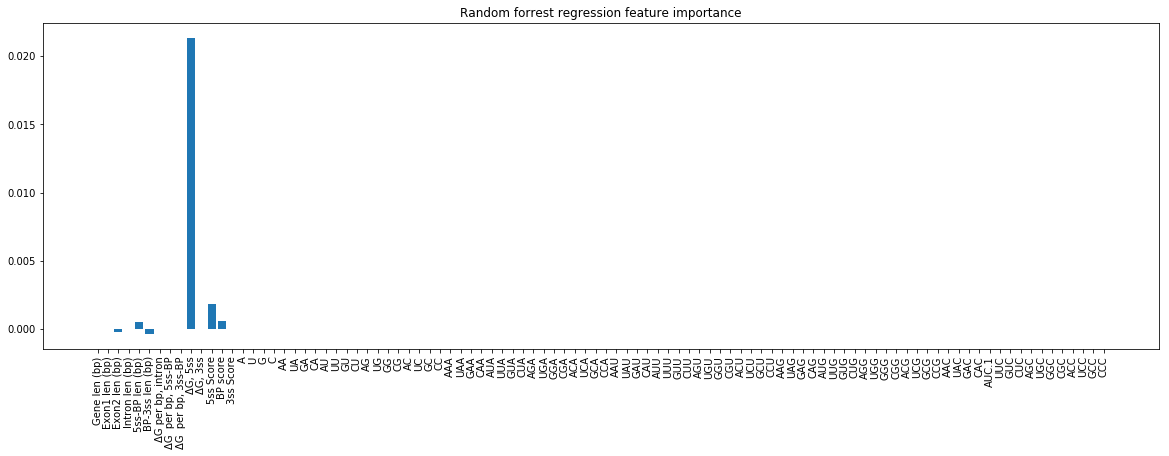

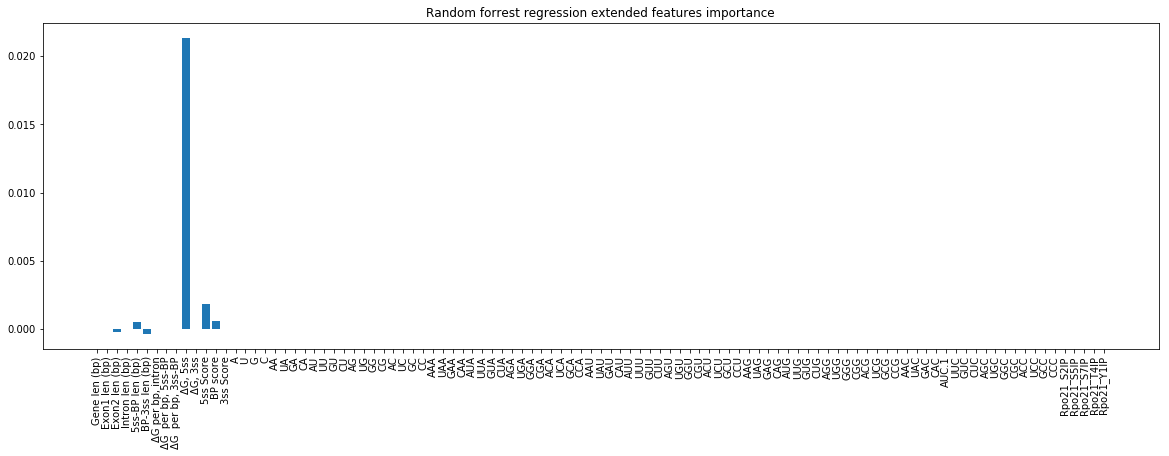

In [26]:
X,y,X2,y2 = get_data('full')

rfr1 = LassoCV(random_state=1337)
rfr2 = LassoCV(random_state=1337)

predictions_rfr1 = cross_val_predict(rfr1,X,y=y,cv=kf)
predictions_rfr2 = cross_val_predict(rfr2,X2,y=y2,cv=kf)

print('Data')
print_stats(y,predictions_rfr1)
print('\n')
print('Extended Data')
print_stats(y2,predictions_rfr2)

rfr1.fit(X,y)
fig, ax1 = plt.subplots(figsize=(20,6))
xx = np.arange(len(rfr1.coef_))
ax1.bar(xx, rfr1.coef_)
ax1.set_xticks(xx)
ax1.set_xticklabels(gene_features.drop(['ORG','Gene','AUC'], axis=1).columns, rotation='vertical')
ax1.set_title('Random forrest regression feature importance')

rfr2.fit(X2,y2)
fig2, ax2 = plt.subplots(figsize=(20,6))
xx = np.arange(len(rfr2.coef_))
ax2.bar(xx, rfr2.coef_)
ax2.set_xticks(xx)
ax2.set_xticklabels(extended_features.drop(['ORG','Gene','AUC'], axis=1).columns, rotation='vertical')
ax2.set_title('Random forrest regression extended features importance')

# Full Set

In [193]:
X,y,X2,y2 = get_data('full')
print('echo')
mxf = [5,7,10,12,15,18,20,25,30,50,80,10]
md = [5,7,10,12,15,18,20]
n_est = [10,20,30,40,50,60,80,90,100,120,140,160]

a = [0.00005,0.0001,0.0003,0.0005,0.0008,0.001,0.005]
ft = [True,False]
norm = [True,False]

results_1_full = np.zeros((len(a),len(ft),len(norm)))
results_2_full = np.zeros((len(a),len(ft),len(norm)))

f = FloatProgress(min=0, max=(len(a)*len(ft)*len(norm)))
display(f)


i = 0
for alpha in a:
    j = 0
    for fit_intercept in ft:
        k = 0
        for normalize in norm:            
            
            kf = KFold(n_splits=5,shuffle=True,random_state=0)

            rfr1 = Lasso(random_state=1337,alpha=alpha,fit_intercept=fit_intercept, normalize=normalize)

            rfr2 = Lasso(random_state=1337,alpha=alpha,fit_intercept=fit_intercept, normalize=normalize)

            predictions_rfr1 = cross_val_predict(rfr1,X=X,y=y,cv=kf)
            predictions_rfr2 = cross_val_predict(rfr2,X=X2,y=y2,cv=kf)
            
            print('alpha: {}; fit_intercept: {}; normalize: {};\n'.format(alpha,fit_intercept,normalize))

            print('Normal feature space')
            print_stats(y, predictions_rfr1)
            print('\n')
            print('Extended feature space')
            print_stats(y2, predictions_rfr2)
            print('-------------------------------------------------------\n')
            

            results_1_full[i][j][k]=np.corrcoef(y, predictions_rfr1)[0][1]
            results_2_full[i][j][k]=np.corrcoef(y2, predictions_rfr2)[0][1]
            
            f.value += 1
            
            k += 1
        j += 1
    i += 1

echo


FloatProgress(value=0.0, max=28.0)

alpha: 5e-05; fit_intercept: True; normalize: True;

Normal feature space
Coefficient of determination R^2: -0.084693082894443
Mean squared error:               0.05657187907323432
Mean absolute error:              0.18184061888712053
Root mean squared error:          0.23784843718896773
Correlation Coefficient:          0.5286325066811739


Extended feature space
Coefficient of determination R^2: -0.19266275719422477
Mean squared error:               0.062203008702792544
Mean absolute error:              0.18961723546383694
Root mean squared error:          0.2494053100934151
Correlation Coefficient:          0.47097359534580757
-------------------------------------------------------



/home/ghristov/miniconda3/envs/mlp/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/ghristov/miniconda3/envs/mlp/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/ghristov/miniconda3/envs/mlp/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/ghristov/miniconda3/envs/mlp/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.

alpha: 5e-05; fit_intercept: True; normalize: False;

Normal feature space
Coefficient of determination R^2: 0.15195055651229517
Mean squared error:               0.04422979303702157
Mean absolute error:              0.15771877929446143
Root mean squared error:          0.2103088039931319
Correlation Coefficient:          0.5345096640595499


Extended feature space
Coefficient of determination R^2: 0.09785390112099845
Mean squared error:               0.04705118970242345
Mean absolute error:              0.16535344303437605
Root mean squared error:          0.2169128620032096
Correlation Coefficient:          0.5218526930872156
-------------------------------------------------------



/home/ghristov/miniconda3/envs/mlp/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/ghristov/miniconda3/envs/mlp/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/ghristov/miniconda3/envs/mlp/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/ghristov/miniconda3/envs/mlp/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.

alpha: 5e-05; fit_intercept: False; normalize: True;

Normal feature space
Coefficient of determination R^2: 0.15800621449875107
Mean squared error:               0.04391396180630653
Mean absolute error:              0.15635807678165775
Root mean squared error:          0.20955658378181902
Correlation Coefficient:          0.5388912758860004


Extended feature space
Coefficient of determination R^2: 0.09090748474430932
Mean squared error:               0.04741347819992706
Mean absolute error:              0.16684927930798157
Root mean squared error:          0.21774636208195777
Correlation Coefficient:          0.5253250516625184
-------------------------------------------------------

alpha: 5e-05; fit_intercept: False; normalize: False;

Normal feature space
Coefficient of determination R^2: 0.15800621449875107
Mean squared error:               0.04391396180630653
Mean absolute error:              0.15635807678165775
Root mean squared error:          0.20955658378181902
Correlation C

/home/ghristov/miniconda3/envs/mlp/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/ghristov/miniconda3/envs/mlp/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/ghristov/miniconda3/envs/mlp/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/ghristov/miniconda3/envs/mlp/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.

alpha: 0.0001; fit_intercept: True; normalize: True;

Normal feature space
Coefficient of determination R^2: -0.020744255755898777
Mean squared error:               0.05323664501227466
Mean absolute error:              0.17488817415867053
Root mean squared error:          0.23073067635725134
Correlation Coefficient:          0.5322741990739155


Extended feature space
Coefficient of determination R^2: -0.11806586520680007
Mean squared error:               0.05831242765336734
Mean absolute error:              0.18400592711608538
Root mean squared error:          0.24147966302230783
Correlation Coefficient:          0.4847063376561539
-------------------------------------------------------

alpha: 0.0001; fit_intercept: True; normalize: False;

Normal feature space
Coefficient of determination R^2: 0.2489079556128797
Mean squared error:               0.03917300568982378
Mean absolute error:              0.14439614751847304
Root mean squared error:          0.19792171606426562
Correlation

/home/ghristov/miniconda3/envs/mlp/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/ghristov/miniconda3/envs/mlp/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/ghristov/miniconda3/envs/mlp/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/ghristov/miniconda3/envs/mlp/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.

alpha: 0.0001; fit_intercept: False; normalize: True;

Normal feature space
Coefficient of determination R^2: 0.25782184372333306
Mean squared error:               0.03870810422764124
Mean absolute error:              0.14211773332618255
Root mean squared error:          0.1967437527029543
Correlation Coefficient:          0.5687915634164925


Extended feature space
Coefficient of determination R^2: 0.2275313549204211
Mean squared error:               0.040287896610067875
Mean absolute error:              0.1517021671368133
Root mean squared error:          0.2007184510952291
Correlation Coefficient:          0.5673448912959413
-------------------------------------------------------



/home/ghristov/miniconda3/envs/mlp/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/ghristov/miniconda3/envs/mlp/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/ghristov/miniconda3/envs/mlp/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/ghristov/miniconda3/envs/mlp/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.

alpha: 0.0001; fit_intercept: False; normalize: False;

Normal feature space
Coefficient of determination R^2: 0.25782184372333306
Mean squared error:               0.03870810422764124
Mean absolute error:              0.14211773332618255
Root mean squared error:          0.1967437527029543
Correlation Coefficient:          0.5687915634164925


Extended feature space
Coefficient of determination R^2: 0.2275313549204211
Mean squared error:               0.040287896610067875
Mean absolute error:              0.1517021671368133
Root mean squared error:          0.2007184510952291
Correlation Coefficient:          0.5673448912959413
-------------------------------------------------------

alpha: 0.0003; fit_intercept: True; normalize: True;

Normal feature space
Coefficient of determination R^2: 0.12130158944170366
Mean squared error:               0.0458282817580986
Mean absolute error:              0.1626293421397027
Root mean squared error:          0.2140754113813602
Correlation Coeffi

/home/ghristov/miniconda3/envs/mlp/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/ghristov/miniconda3/envs/mlp/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/ghristov/miniconda3/envs/mlp/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/ghristov/miniconda3/envs/mlp/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.

alpha: 0.0003; fit_intercept: True; normalize: False;

Normal feature space
Coefficient of determination R^2: 0.3594336903079972
Mean squared error:               0.033408565410581174
Mean absolute error:              0.13019821639626317
Root mean squared error:          0.18278010124349198
Correlation Coefficient:          0.6151642060431097


Extended feature space
Coefficient of determination R^2: 0.3236577732157464
Mean squared error:               0.035274448845622704
Mean absolute error:              0.13990182228792244
Root mean squared error:          0.18781493243515732
Correlation Coefficient:          0.5972049212312934
-------------------------------------------------------

alpha: 0.0003; fit_intercept: False; normalize: True;

Normal feature space
Coefficient of determination R^2: 0.3538068696595662
Mean squared error:               0.03370203074405634
Mean absolute error:              0.1302426679991404
Root mean squared error:          0.18358112850741587
Correlation Co

/home/ghristov/miniconda3/envs/mlp/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/ghristov/miniconda3/envs/mlp/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/ghristov/miniconda3/envs/mlp/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/ghristov/miniconda3/envs/mlp/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.

alpha: 0.0003; fit_intercept: False; normalize: False;

Normal feature space
Coefficient of determination R^2: 0.3538068696595662
Mean squared error:               0.03370203074405634
Mean absolute error:              0.1302426679991404
Root mean squared error:          0.18358112850741587
Correlation Coefficient:          0.6125069116979585


Extended feature space
Coefficient of determination R^2: 0.3018979216839899
Mean squared error:               0.036409328111397334
Mean absolute error:              0.142597654030661
Root mean squared error:          0.1908122850117291
Correlation Coefficient:          0.5855388349373513
-------------------------------------------------------

alpha: 0.0005; fit_intercept: True; normalize: True;

Normal feature space
Coefficient of determination R^2: 0.21737382472970512
Mean squared error:               0.0408176598939809
Mean absolute error:              0.15272199409922046
Root mean squared error:          0.2020338087894719
Correlation Coeffic

/home/ghristov/miniconda3/envs/mlp/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/ghristov/miniconda3/envs/mlp/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/ghristov/miniconda3/envs/mlp/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/ghristov/miniconda3/envs/mlp/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.

alpha: 0.0005; fit_intercept: False; normalize: True;

Normal feature space
Coefficient of determination R^2: 0.36705491917004907
Mean squared error:               0.03301108224748867
Mean absolute error:              0.13138478575493656
Root mean squared error:          0.1816895215676696
Correlation Coefficient:          0.6170988419411546


Extended feature space
Coefficient of determination R^2: 0.3247038105892073
Mean squared error:               0.03521989304478768
Mean absolute error:              0.1385184260176752
Root mean squared error:          0.18766963804725495
Correlation Coefficient:          0.5957474239852885
-------------------------------------------------------

alpha: 0.0005; fit_intercept: False; normalize: False;

Normal feature space
Coefficient of determination R^2: 0.36705491917004907
Mean squared error:               0.03301108224748867
Mean absolute error:              0.13138478575493656
Root mean squared error:          0.1816895215676696
Correlation Coe

/home/ghristov/miniconda3/envs/mlp/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/ghristov/miniconda3/envs/mlp/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/ghristov/miniconda3/envs/mlp/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/ghristov/miniconda3/envs/mlp/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.

alpha: 0.0008; fit_intercept: True; normalize: False;

Normal feature space
Coefficient of determination R^2: 0.37476795903772275
Mean squared error:               0.03260881070583126
Mean absolute error:              0.12919412612164366
Root mean squared error:          0.18057909819752468
Correlation Coefficient:          0.6170610140409009


Extended feature space
Coefficient of determination R^2: 0.3419064024405213
Mean squared error:               0.03432269644484085
Mean absolute error:              0.13709530625469196
Root mean squared error:          0.1852638562829805
Correlation Coefficient:          0.5996792354171416
-------------------------------------------------------

alpha: 0.0008; fit_intercept: False; normalize: True;

Normal feature space
Coefficient of determination R^2: 0.36667957867893675
Mean squared error:               0.03303065803091474
Mean absolute error:              0.13336239977171396
Root mean squared error:          0.1817433851091003
Correlation Coe

/home/ghristov/miniconda3/envs/mlp/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/ghristov/miniconda3/envs/mlp/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/ghristov/miniconda3/envs/mlp/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/ghristov/miniconda3/envs/mlp/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.

alpha: 0.0008; fit_intercept: False; normalize: False;

Normal feature space
Coefficient of determination R^2: 0.36667957867893675
Mean squared error:               0.03303065803091474
Mean absolute error:              0.13336239977171396
Root mean squared error:          0.1817433851091003
Correlation Coefficient:          0.6141790329920296


Extended feature space
Coefficient of determination R^2: 0.33199917459318495
Mean squared error:               0.034839405276646904
Mean absolute error:              0.13880964259767922
Root mean squared error:          0.18665316840773666
Correlation Coefficient:          0.5970467798158491
-------------------------------------------------------

alpha: 0.001; fit_intercept: True; normalize: True;

Normal feature space
Coefficient of determination R^2: 0.3038938487266978
Mean squared error:               0.036305231067653154
Mean absolute error:              0.13905438411414475
Root mean squared error:          0.19053931633039192
Correlation C

/home/ghristov/miniconda3/envs/mlp/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/ghristov/miniconda3/envs/mlp/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/ghristov/miniconda3/envs/mlp/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/ghristov/miniconda3/envs/mlp/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.

alpha: 0.001; fit_intercept: False; normalize: True;

Normal feature space
Coefficient of determination R^2: 0.3614274810759064
Mean squared error:               0.03330457978368061
Mean absolute error:              0.1351253215731763
Root mean squared error:          0.18249542400750932
Correlation Coefficient:          0.6094565171705252


Extended feature space
Coefficient of determination R^2: 0.3313233621576235
Mean squared error:               0.034874652094372294
Mean absolute error:              0.1389539162254035
Root mean squared error:          0.18674756248575855
Correlation Coefficient:          0.5939597022454441
-------------------------------------------------------

alpha: 0.001; fit_intercept: False; normalize: False;

Normal feature space
Coefficient of determination R^2: 0.3614274810759064
Mean squared error:               0.03330457978368061
Mean absolute error:              0.1351253215731763
Root mean squared error:          0.18249542400750932
Correlation Coeffi

/home/ghristov/miniconda3/envs/mlp/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/ghristov/miniconda3/envs/mlp/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/ghristov/miniconda3/envs/mlp/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/ghristov/miniconda3/envs/mlp/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.

alpha: 0.005; fit_intercept: True; normalize: False;

Normal feature space
Coefficient of determination R^2: 0.2785590466119454
Mean squared error:               0.037626560929696316
Mean absolute error:              0.14527116052690137
Root mean squared error:          0.19397567097369792
Correlation Coefficient:          0.5396992045924595


Extended feature space
Coefficient of determination R^2: 0.2678536990868663
Mean squared error:               0.03818489548089458
Mean absolute error:              0.1464304146086599
Root mean squared error:          0.1954095583150798
Correlation Coefficient:          0.5337841634454108
-------------------------------------------------------

alpha: 0.005; fit_intercept: False; normalize: True;

Normal feature space
Coefficient of determination R^2: 0.24353716948902038
Mean squared error:               0.039453117610807366
Mean absolute error:              0.15676389060526735
Root mean squared error:          0.1986280886753114
Correlation Coeff

/home/ghristov/miniconda3/envs/mlp/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [194]:
get_best_settings(results_1_full,results_2_full)

Normal best: 0.6247653570420674 | max_features: 12; max_depth: 5; n_estimators: 20;
Extended best: 0.6037587168678983 | max_features: 12; max_depth: 5; n_estimators: 20;
Best difference: 0.003355530104999893 | max_features: 7; max_depth: 5; n_estimators: 20;


(0.0005, True, False, 0.0005, True, False)

Normal best: 0.6606799891294596 | max_features: 50; max_depth: 12; n_estimators: 20;

Extended best: 0.643178381615747 | max_features: 20; max_depth: 7; n_estimators: 100;

Best difference: 0.0855855290853309 | max_features: 12; max_depth: 12; n_estimators: 10;

Normal best: 0.6247653570420674 | max_features: 12; max_depth: 5; n_estimators: 20;
Extended best: 0.6037587168678983 | max_features: 12; max_depth: 5; n_estimators: 20;
Best difference: 0.003355530104999893 | max_features: 7; max_depth: 5; n_estimators: 20;
Normal feature space
Coefficient of determination R^2: 0.38091114480234256
Mean squared error:               0.032288414487139504
Mean absolute error:              0.12812987937788944
Root mean squared error:          0.17968977290636076
Correlation Coefficient:          0.6247653570420674


Extended feature space
Coefficient of determination R^2: 0.34136870157834476
Mean squared error:               0.03435074009021144
Mean absolute error:              0.13738330358645198
Root mean squared error:          0.18533952651879587
Correlation Coefficient:          0.6037587168678983
-------------------------------------------------------



/home/ghristov/miniconda3/envs/mlp/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/ghristov/miniconda3/envs/mlp/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/ghristov/miniconda3/envs/mlp/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/ghristov/miniconda3/envs/mlp/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.

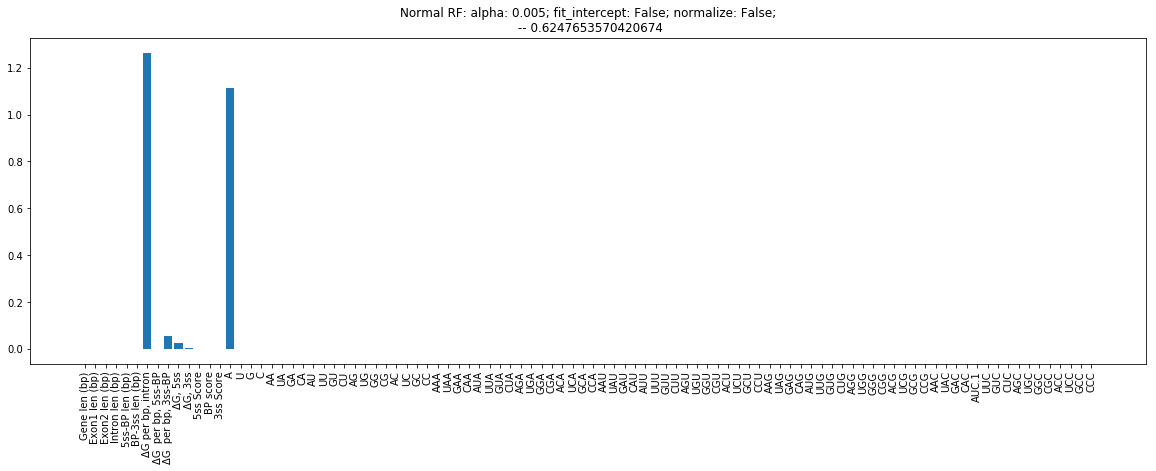

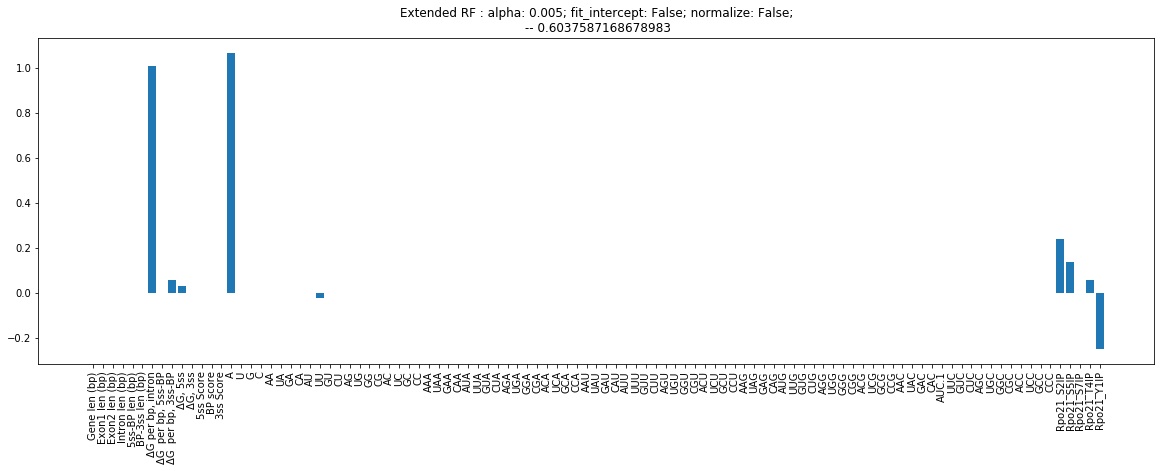

In [195]:
best_RFs(results_1_full,results_2_full,'full')

## MAE Results

Normal best: 0.6485849616979102 | max_features: 50; max_depth: 7; n_estimators: 10;

Extended best: 0.6406053037479402 | max_features: 5; max_depth: 20; n_estimators: 50;

Best difference: 0.10009093774816558 | max_features: 20; max_depth: 5; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: 0.41756892464489404
Mean squared error:               0.03037653773504273
Mean absolute error:              0.1291034188034188
Root mean squared error:          0.1742886620955096
Correlation Coefficient:          0.6485849616979102


Extended feature space
Coefficient of determination R^2: 0.38691168381575647
Mean squared error:               0.03197545797179487
Mean absolute error:              0.13664094017094014
Root mean squared error:          0.1788168279882933
Correlation Coefficient:          0.6406053037479402


# RP Genes

In [31]:
X,y,X2,y2 = get_data('rp')

mxf = [5,7,10,12,15,18,20,25,30,50,80,10]
md = [5,7,10,12,15,18,20]
n_est = [10,20,30,40,50,60,80,90,100,120,140,160]

results_1_rp = np.zeros((len(mxf),len(md),len(n_est)))
results_2_rp = np.zeros((len(mxf),len(md),len(n_est)))

f = FloatProgress(min=0, max=(len(mxf)*len(md)*len(n_est)))
display(f)


i = 0
for max_features in mxf:
    j = 0
    for max_depth in md:
        k = 0
        for n_estimators in n_est:            
            
            kf = KFold(n_splits=5,shuffle=True,random_state=0)

            rfr1 = LassoCV(random_state=1337)

            rfr2 = LassoCV(random_state=1337)

            predictions_rfr1 = cross_val_predict(rfr1,X=X,y=y,cv=kf)
            predictions_rfr2 = cross_val_predict(rfr2,X=X2,y=y2,cv=kf)
            
            print('max_features: {}; max_depth: {}; n_estimators: {};\n'.format(max_features,max_depth,n_estimators))

            print('Normal feature space')
            print_stats(y, predictions_rfr1)
            print('\n')
            print('Extended feature space')
            print_stats(y2, predictions_rfr2)
            print('-------------------------------------------------------\n')
            

            results_1_rp[i][j][k]=np.corrcoef(y, predictions_rfr1)[0][1]
            results_2_rp[i][j][k]=np.corrcoef(y2, predictions_rfr2)[0][1]
            
            f.value += 1
            
            k += 1
        j += 1
    i += 1

FloatProgress(value=0.0, max=1008.0)

max_features: 5; max_depth: 5; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: -0.24085558281945207
Mean squared error:               0.03675641075825996
Mean absolute error:              0.14245027742091085
Root mean squared error:          0.19171961495439102
Correlation Coefficient:          -0.02949004310822956


Extended feature space
Coefficient of determination R^2: -0.24085558281945207
Mean squared error:               0.03675641075825996
Mean absolute error:              0.14245027742091085
Root mean squared error:          0.19171961495439102
Correlation Coefficient:          -0.02949004310822956
-------------------------------------------------------

max_features: 5; max_depth: 5; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: -0.24085558281945207
Mean squared error:               0.03675641075825996
Mean absolute error:              0.14245027742091085
Root mean squared error:          0.19171961495439102
Correlation Coe

max_features: 5; max_depth: 7; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: -0.24085558281945207
Mean squared error:               0.03675641075825996
Mean absolute error:              0.14245027742091085
Root mean squared error:          0.19171961495439102
Correlation Coefficient:          -0.02949004310822956


Extended feature space
Coefficient of determination R^2: -0.24085558281945207
Mean squared error:               0.03675641075825996
Mean absolute error:              0.14245027742091085
Root mean squared error:          0.19171961495439102
Correlation Coefficient:          -0.02949004310822956
-------------------------------------------------------

max_features: 5; max_depth: 7; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: -0.24085558281945207
Mean squared error:               0.03675641075825996
Mean absolute error:              0.14245027742091085
Root mean squared error:          0.19171961495439102
Correlation Coe

KeyboardInterrupt: 

In [17]:
get_best_settings(results_1_rp,results_2_rp)

Normal best: 0.6686151985008865 | max_features: 5; max_depth: 12; n_estimators: 140;
Extended best: 0.6750835594373263 | max_features: 18; max_depth: 18; n_estimators: 90;
Best difference: 0.24783162603570857 | max_features: 15; max_depth: 5; n_estimators: 20;


(5, 12, 140, 18, 18, 90)

Normal best: 0.0 | max_features: 5; max_depth: 7; n_estimators: 120;
Extended best: 0.0 | max_features: 5; max_depth: 7; n_estimators: 120;
Best difference: 0.0 | max_features: 5; max_depth: 5; n_estimators: 10;
Normal feature space
Coefficient of determination R^2: -0.24085558281945207
Mean squared error:               0.03675641075825996
Mean absolute error:              0.14245027742091085
Root mean squared error:          0.19171961495439102
Correlation Coefficient:          -0.02949004310822956


Extended feature space
Coefficient of determination R^2: -0.24085558281945207
Mean squared error:               0.03675641075825996
Mean absolute error:              0.14245027742091085
Root mean squared error:          0.19171961495439102
Correlation Coefficient:          -0.02949004310822956
-------------------------------------------------------



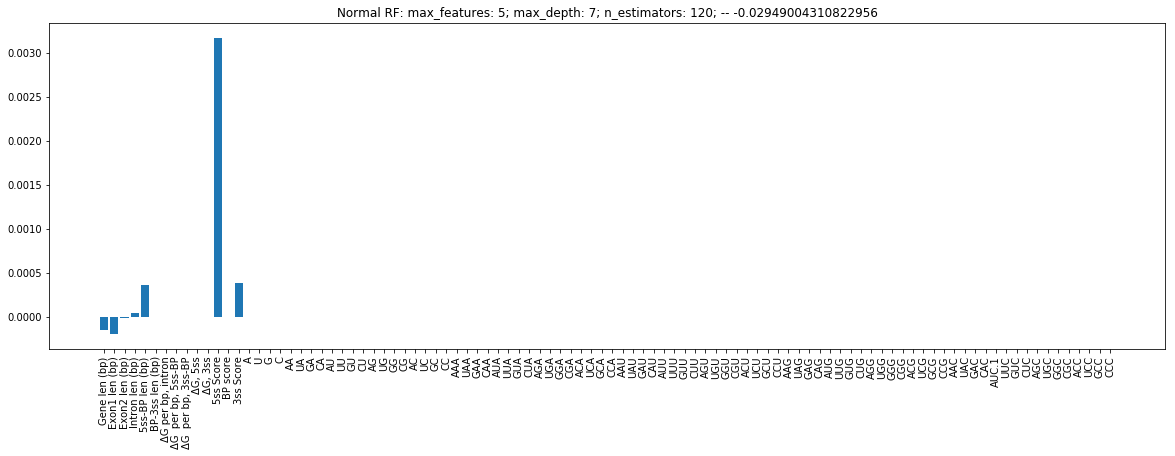

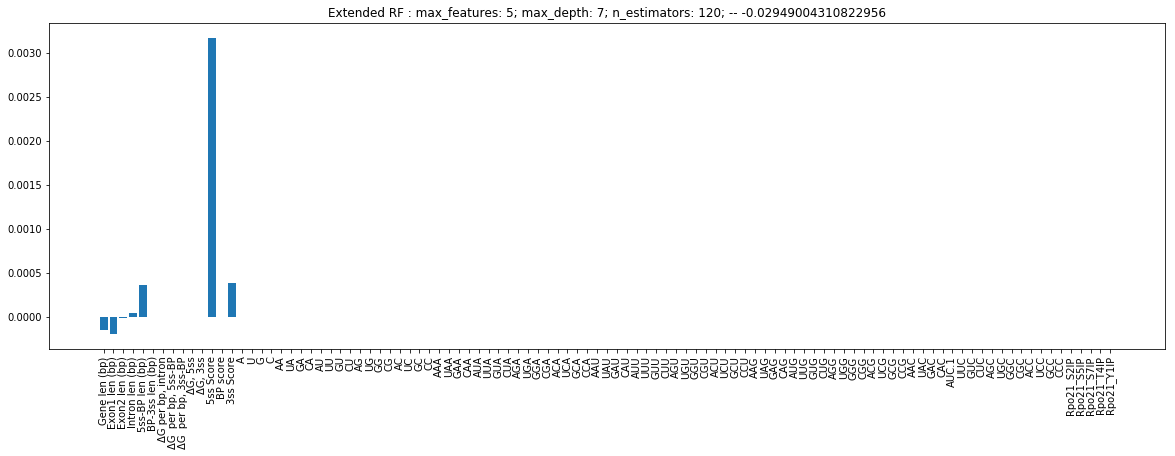

In [34]:
best_RFs(results_1_rp,results_2_rp,'rp')

Normal best: 0.683828520812472 | max_features: 80; max_depth: 12; n_estimators: 10;
Extended best: 0.6995253307038448 | max_features: 25; max_depth: 5; n_estimators: 10;
Best difference: 0.178522036722764 | max_features: 7; max_depth: 5; n_estimators: 20;
Normal feature space
Coefficient of determination R^2: 0.3526340326994295
Mean squared error:               0.03376319974358975
Mean absolute error:              0.13876153846153846
Root mean squared error:          0.18374765234851234
Correlation Coefficient:          0.5972822538667238


Extended feature space
Coefficient of determination R^2: 0.32708078033033505
Mean squared error:               0.03509592282051282
Mean absolute error:              0.14166068376068375
Root mean squared error:          0.18733905844887985
Correlation Coefficient:          0.5756356719726347

# Non-RP Genes

In [35]:
X,y,X2,y2 = get_data('nrp')

mxf = [5,7,10,12,15,18,20,25,30,50,80,10]
md = [5,7,10,12,15,18,20]
n_est = [10,20,30,40,50,60,80,90,100,120,140,160]

results_1_nrp = np.zeros((len(mxf),len(md),len(n_est)))
results_2_nrp = np.zeros((len(mxf),len(md),len(n_est)))

f = FloatProgress(min=0, max=(len(mxf)*len(md)*len(n_est)))
display(f)


i = 0
for max_features in mxf:
    j = 0
    for max_depth in md:
        k = 0
        for n_estimators in n_est:            
            
            kf = KFold(n_splits=5,shuffle=True,random_state=0)

            rfr1 = LassoCV(random_state=1337)

            rfr2 = LassoCV(random_state=1337)

            predictions_rfr1 = cross_val_predict(rfr1,X=X,y=y,cv=kf)
            predictions_rfr2 = cross_val_predict(rfr2,X=X2,y=y2,cv=kf)
            
            print('max_features: {}; max_depth: {}; n_estimators: {};\n'.format(max_features,max_depth,n_estimators))

            print('Normal feature space')
            print_stats(y, predictions_rfr1)
            print('\n')
            print('Extended feature space')
            print_stats(y2, predictions_rfr2)
            print('-------------------------------------------------------\n')
            

            results_1_nrp[i][j][k]=np.corrcoef(y, predictions_rfr1)[0][1]
            results_2_nrp[i][j][k]=np.corrcoef(y2, predictions_rfr2)[0][1]
            
            f.value += 1
            
            k += 1
        j += 1
    i += 1

FloatProgress(value=0.0, max=1008.0)

max_features: 5; max_depth: 5; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: 0.07602718564990063
Mean squared error:               0.0540537230553822
Mean absolute error:              0.18573751959529314
Root mean squared error:          0.23249456564698925
Correlation Coefficient:          0.30004513320260096


Extended feature space
Coefficient of determination R^2: 0.07602718564990063
Mean squared error:               0.0540537230553822
Mean absolute error:              0.18573751959529314
Root mean squared error:          0.23249456564698925
Correlation Coefficient:          0.30004513320260096
-------------------------------------------------------

max_features: 5; max_depth: 5; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: 0.07602718564990063
Mean squared error:               0.0540537230553822
Mean absolute error:              0.18573751959529314
Root mean squared error:          0.23249456564698925
Correlation Coefficient

max_features: 5; max_depth: 7; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: 0.07602718564990063
Mean squared error:               0.0540537230553822
Mean absolute error:              0.18573751959529314
Root mean squared error:          0.23249456564698925
Correlation Coefficient:          0.30004513320260096


Extended feature space
Coefficient of determination R^2: 0.07602718564990063
Mean squared error:               0.0540537230553822
Mean absolute error:              0.18573751959529314
Root mean squared error:          0.23249456564698925
Correlation Coefficient:          0.30004513320260096
-------------------------------------------------------

max_features: 5; max_depth: 7; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: 0.07602718564990063
Mean squared error:               0.0540537230553822
Mean absolute error:              0.18573751959529314
Root mean squared error:          0.23249456564698925
Correlation Coefficient

max_features: 5; max_depth: 10; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: 0.07602718564990063
Mean squared error:               0.0540537230553822
Mean absolute error:              0.18573751959529314
Root mean squared error:          0.23249456564698925
Correlation Coefficient:          0.30004513320260096


Extended feature space
Coefficient of determination R^2: 0.07602718564990063
Mean squared error:               0.0540537230553822
Mean absolute error:              0.18573751959529314
Root mean squared error:          0.23249456564698925
Correlation Coefficient:          0.30004513320260096
-------------------------------------------------------

max_features: 5; max_depth: 10; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: 0.07602718564990063
Mean squared error:               0.0540537230553822
Mean absolute error:              0.18573751959529314
Root mean squared error:          0.23249456564698925
Correlation Coefficie

max_features: 5; max_depth: 12; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: 0.07602718564990063
Mean squared error:               0.0540537230553822
Mean absolute error:              0.18573751959529314
Root mean squared error:          0.23249456564698925
Correlation Coefficient:          0.30004513320260096


Extended feature space
Coefficient of determination R^2: 0.07602718564990063
Mean squared error:               0.0540537230553822
Mean absolute error:              0.18573751959529314
Root mean squared error:          0.23249456564698925
Correlation Coefficient:          0.30004513320260096
-------------------------------------------------------

max_features: 5; max_depth: 12; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: 0.07602718564990063
Mean squared error:               0.0540537230553822
Mean absolute error:              0.18573751959529314
Root mean squared error:          0.23249456564698925
Correlation Coefficie

KeyboardInterrupt: 

In [21]:
get_best_settings(results_1_nrp,results_2_nrp)

Normal best: 0.32295291283191135 | max_features: 80; max_depth: 5; n_estimators: 30;
Extended best: 0.3857487359394915 | max_features: 18; max_depth: 5; n_estimators: 10;
Best difference: 0.2576645743798909 | max_features: 18; max_depth: 5; n_estimators: 10;


(80, 5, 30, 18, 5, 10)

Normal best: 0.30004513320260096 | max_features: 5; max_depth: 5; n_estimators: 10;
Extended best: 0.30004513320260096 | max_features: 5; max_depth: 5; n_estimators: 10;
Best difference: 0.0 | max_features: 5; max_depth: 5; n_estimators: 10;
Normal feature space
Coefficient of determination R^2: 0.07602718564990063
Mean squared error:               0.0540537230553822
Mean absolute error:              0.18573751959529314
Root mean squared error:          0.23249456564698925
Correlation Coefficient:          0.30004513320260096


Extended feature space
Coefficient of determination R^2: 0.07602718564990063
Mean squared error:               0.0540537230553822
Mean absolute error:              0.18573751959529314
Root mean squared error:          0.23249456564698925
Correlation Coefficient:          0.30004513320260096
-------------------------------------------------------



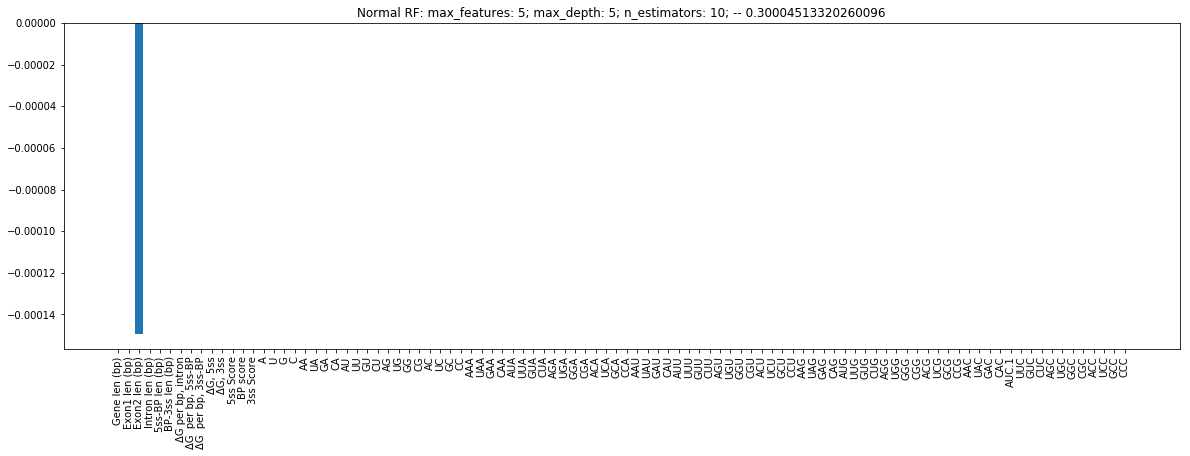

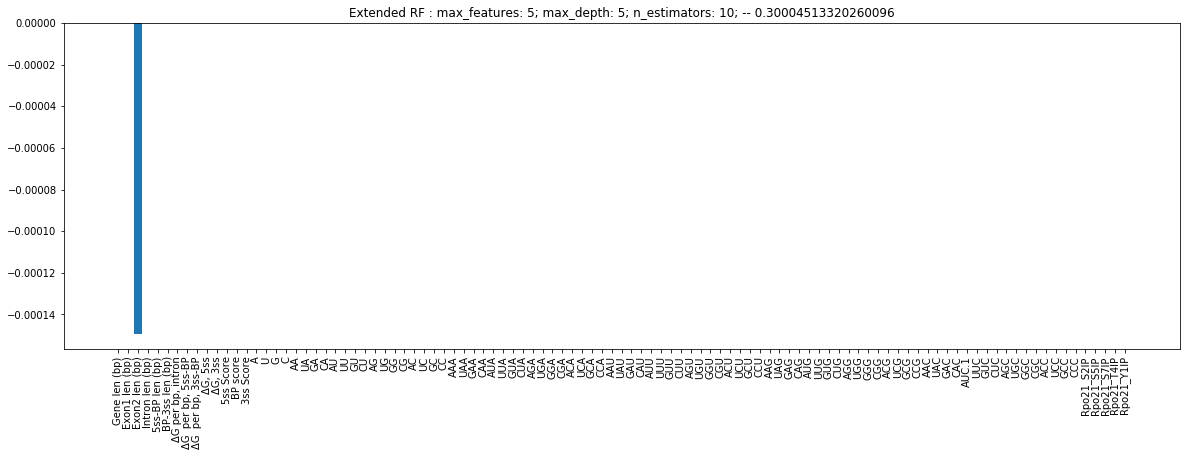

In [36]:
best_RFs(results_1_nrp,results_2_nrp,'nrp')

In [23]:
Normal best: 0.2969901764177368 | max_features: 25; max_depth: 5; n_estimators: 10;
Extended best: 0.40630448232918154 | max_features: 30; max_depth: 7; n_estimators: 20;
Best difference: 0.2582434619528223 | max_features: 30; max_depth: 7; n_estimators: 20;
Normal feature space
Coefficient of determination R^2: 0.2360352774266372
Mean squared error:               0.03984437679487179
Mean absolute error:              0.1488410256410256
Root mean squared error:          0.19961056283391365
Correlation Coefficient:          0.48848065665874996


Extended feature space
Coefficient of determination R^2: 0.38909635792549957
Mean squared error:               0.031861516874999996
Mean absolute error:              0.13109380341880345
Root mean squared error:          0.1784979464167585
Correlation Coefficient:          0.6250700537546936

SyntaxError: invalid syntax (<ipython-input-23-6872f7d45784>, line 1)

Coefficient of determination R^2: 0.22679697269381738
Mean squared error:               0.04032619811965812
Mean absolute error:              0.1447948717948718
Root mean squared error:          0.2008138394624686
Correlation Coefficient:          0.4992323501777428
98
2


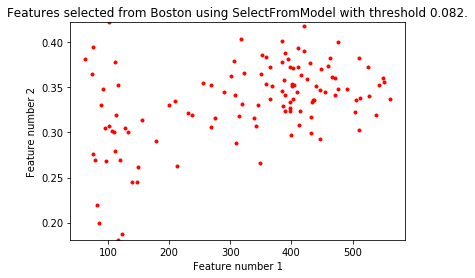

In [84]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LassoCV

X, y, X2, y2 = get_data('full')

# We use the base estimator LassoCV since the L1 norm promotes sparsity of features.
clf = LassoCV()
rfr = ExtraTreesRegressor(random_state=1337)
pred = cross_val_predict(rfr,X=X,y=y,cv=kf)
print_stats(y,pred)
# Set a minimum threshold of 0.25
sfm = SelectFromModel(rfr, threshold=0)
sfm.fit(X, y2)
n_features = sfm.transform(X).shape[1]
print(n_features)
# Reset the threshold till the number of features equals two.
# Note that the attribute can be set directly instead of repeatedly
# fitting the metatransformer.
while n_features > 2:
    sfm.threshold += 0.001
    X_transform = sfm.transform(X)
    n_features = X_transform.shape[1]
    
print(n_features)
# Plot the selected two features from X.
plt.title(
    "Features selected from Boston using SelectFromModel with "
    "threshold %0.3f." % sfm.threshold)
feature1 = X_transform[:, 0]
feature2 = X_transform[:, 1]
plt.plot(feature1, feature2, 'r.')
plt.xlabel("Feature number 1")
plt.ylabel("Feature number 2")
plt.ylim([np.min(feature2), np.max(feature2)])
plt.show()

In [101]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
# load the iris datasets
X,y,X2,y2 = get_data('full')
# create a base classifier used to evaluate a subset of attributes
model = Lasso()
# create the RFE model and select 3 attributes
rfe = RFE(model, 5)
rfe = rfe.fit(X, y)
# summarize the selection of the attributes
print(rfe.support_)
print(rfe.ranking_)

[False False  True False  True False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False  True
  True  True]
[94 93  1 12  1 11 10  9  8  7 14 16 18 20 22 24 26 28 30 32 34 36 38 40
 42 44 46 48 50 52 54 56 58 60 62 64 66 68 70 72 74 76 78 80 82 84 86 88
 90 92 91 89 87 85 83 81 79 77 75 73 71 69 67 65 63 61 59 57 55 53 51 49
 47 45 43 41 39 37 35 33 31 29 27 25 23 21 19 17 15 13  6  5  4  3  2  1
  1  1]


In [99]:
X,y,X2,y2 = get_data('full')

kf = KFold(n_splits=5,shuffle=True,random_state=0)


rfr1 = ExtraTreesRegressor(random_state=1337)
rfr2 = ExtraTreesRegressor(random_state=1337)

predictions_rfr1 = cross_val_predict(rfr1,X,y=y,cv=kf)
predictions_rfr2 = cross_val_predict(rfr2,X2,y=y2,cv=kf)

print('Normal feature space')
print_stats(y, predictions_rfr1)
print('\n')
print('Extended feature space')
print_stats(y2, predictions_rfr2)
print('-------------------------------------------------------\n')

settings = 'max_features: {}; max_depth: {}; n_estimators: {};'.format(mxf1,md1,n_est1)

rfr1.fit(X,y)
fig, ax1 = plt.subplots(figsize=(20,6))
xx = np.arange(len(rfr1.coef_))
ax1.bar(xx, rfr1.coef_)
ax1.set_xticks(xx)
ax1.set_xticklabels(gene_features.drop(['ORG','Gene','AUC'], axis=1).columns, rotation='vertical')
ax1.set_title('Normal RF: {} -- {}'.format(settings,np.corrcoef(y, predictions_rfr1)[0][1]))

settings = 'max_features: {}; max_depth: {}; n_estimators: {};'.format(mxf2,md2,n_est2)
rfr2.fit(X2,y2)
fig2, ax2 = plt.subplots(figsize=(20,6))
xx = np.arange(len(rfr2.coef_))
ax2.bar(xx, rfr2.coef_)
ax2.set_xticks(xx)
ax2.set_xticklabels(extended_features.drop(['ORG','Gene','AUC'], axis=1).columns, rotation='vertical')
ax2.set_title('Extended RF : {} -- {}'.format(settings,np.corrcoef(y2, predictions_rfr2)[0][1]))

TypeError: unhashable type: 'slice'

In [107]:
#A helper method for pretty-printing linear models
def pretty_print_linear(coefs, names = None, sort = False):
    if names is None:
        names = ["X%s" % x for x in range(len(coefs))]
    lst = zip(coefs, names)
    if sort:
        lst = sorted(lst,  key = lambda x:-np.abs(x[0]))
    return " + ".join("%s * %s" % (round(coef, 3), name)
                                   for coef, name in lst)

In [150]:
names = gene_features.drop(['ORG','Gene','AUC'], axis=1).columns
X,y,X2,y2 = get_data('full')  
lasso = Lasso(alpha=.008,fit_intercept=True,normalize=True)


lasso.fit(X, y)
print ("Lasso model: ", pretty_print_linear(lasso.coef_, names, sort = True))

Lasso model:  0.75 * A + 0.0 * 5ss-BP len (bp) + -0.0 * Gene len (bp) + 0.0 * Exon1 len (bp) + -0.0 * Exon2 len (bp) + 0.0 * Intron len (bp) + -0.0 * BP-3ss len (bp) + -0.0 * ΔG per bp, intron + -0.0 * ΔG  per bp, 5ss-BP + -0.0 * ΔG  per bp, 3ss-BP + 0.0 * ΔG, 5ss + 0.0 * ΔG, 3ss + 0.0 * 5ss Score + 0.0 * BP score + 0.0 * 3ss Score + -0.0 * U + 0.0 * G + -0.0 * C + 0.0 * AA + 0.0 * UA + 0.0 * GA + -0.0 * CA + 0.0 * AU + -0.0 * UU + -0.0 * GU + -0.0 * CU + 0.0 * AG + -0.0 * UG + 0.0 * GG + -0.0 * CG + -0.0 * AC + -0.0 * UC + -0.0 * GC + 0.0 * CC + 0.0 * AAA + 0.0 * UAA + 0.0 * GAA + 0.0 * CAA + 0.0 * AUA + -0.0 * UUA + -0.0 * GUA + -0.0 * CUA + 0.0 * AGA + 0.0 * UGA + 0.0 * GGA + 0.0 * CGA + -0.0 * ACA + 0.0 * UCA + -0.0 * GCA + 0.0 * CCA + 0.0 * AAU + 0.0 * UAU + 0.0 * GAU + -0.0 * CAU + 0.0 * AUU + -0.0 * UUU + -0.0 * GUU + -0.0 * CUU + 0.0 * AGU + -0.0 * UGU + -0.0 * GGU + -0.0 * CGU + -0.0 * ACU + -0.0 * UCU + -0.0 * GCU + -0.0 * CCU + 0.0 * AAG + 0.0 * UAG + 0.0 * GAG + -0.0 * CAG 

(103,)


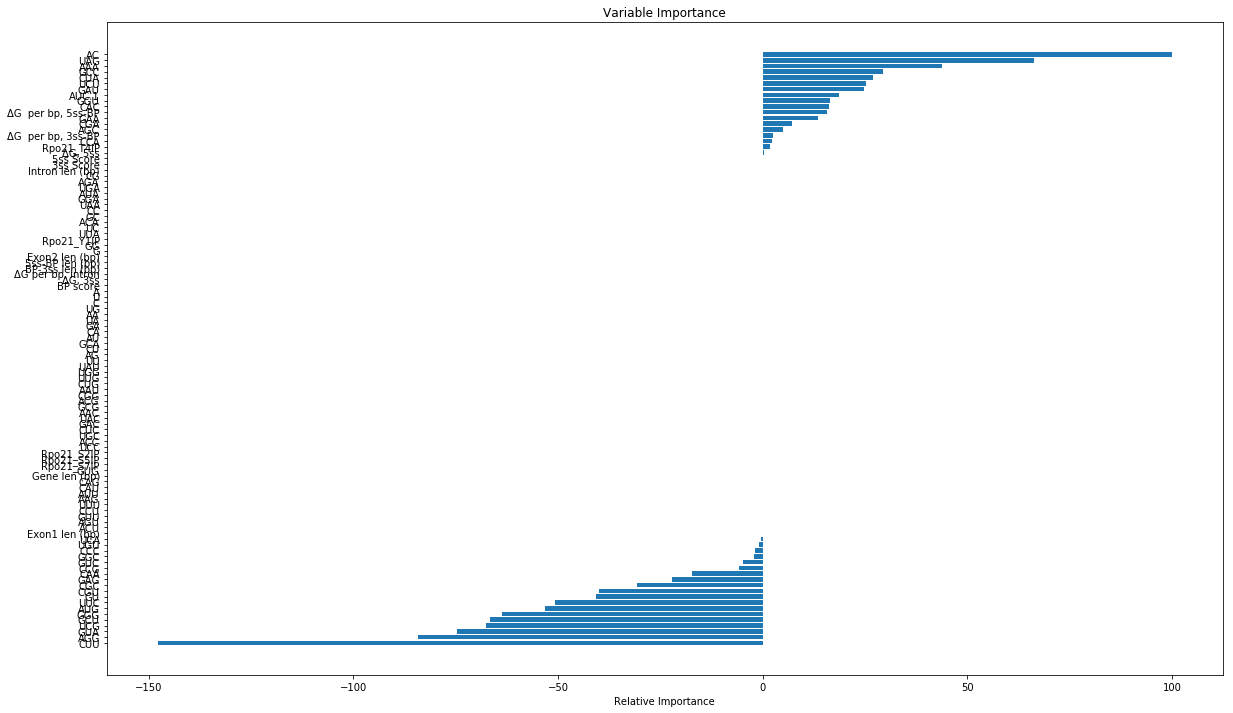

In [198]:
names = extended_features.drop(['ORG','Gene','AUC'], axis=1).columns
X,y,X2,y2 = get_data('rp')  
lasso = Lasso(alpha=.0005,fit_intercept=True,normalize=True)


lasso.fit(X2, y2)
#print ("Lasso model: ", pretty_print_linear(lasso.coef_, names, sort = True))
print(lasso.coef_.shape)
plot_importance(names,lasso.coef_)

In [131]:
names = extended_features.drop(['ORG','Gene','AUC'], axis=1).columns
X,y,X2,y2 = get_data('cut')  

lasso = Lasso(alpha=.0008)
lasso = Lasso(alpha=.0008)

kf = KFold(n_splits=5,shuffle=True,random_state=0)

lasso.fit(X, y)


predict2 = cross_val_predict(lasso,X,y,cv=kf)
print_stats(y,predict2)

lasso.fit(X2, y2)
  
print ("Lasso model: ", pretty_print_linear(lasso.coef_, names, sort = True))

  
print ("Lasso model: ", pretty_print_linear(lasso2.coef_, names, sort = True))

predict = cross_val_predict(lasso,X2,y2,cv=kf)
print_stats(y2,predict)

Lasso model:  0.97 * A + 0.892 * ΔG per bp, intron + 0.028 * ΔG, 5ss + 0.005 * ΔG, 3ss + 0.002 * 5ss Score + 0.001 * Intron len (bp) + -0.001 * BP-3ss len (bp) + 0.0 * BP score + -0.0 * Exon2 len (bp) + 0.0 * 3ss Score + -0.0 * Gene len (bp) + 0.0 * 5ss-BP len (bp) + 0.0 * Exon1 len (bp) + 0.0 * ΔG  per bp, 5ss-BP + 0.0 * ΔG  per bp, 3ss-BP + -0.0 * U + -0.0 * G + -0.0 * C + 0.0 * AA + 0.0 * UA + 0.0 * GA + -0.0 * CA + 0.0 * AU + -0.0 * UU + -0.0 * GU + -0.0 * CU + 0.0 * AG + -0.0 * UG + -0.0 * GG + -0.0 * CG + -0.0 * AC + -0.0 * UC + -0.0 * GC + 0.0 * CC + 0.0 * AAA + -0.0 * UAA + 0.0 * GAA + -0.0 * CAA + 0.0 * AUA + 0.0 * UUA + -0.0 * GUA + 0.0 * CUA + 0.0 * AGA + 0.0 * UGA + 0.0 * GGA + 0.0 * CGA + -0.0 * ACA + 0.0 * UCA + -0.0 * GCA + 0.0 * CCA + -0.0 * AAU + 0.0 * UAU + 0.0 * GAU + 0.0 * CAU + 0.0 * AUU + -0.0 * UUU + -0.0 * GUU + -0.0 * CUU + 0.0 * AGU + -0.0 * UGU + -0.0 * GGU + 0.0 * CGU + -0.0 * ACU + 0.0 * UCU + -0.0 * GCU + -0.0 * CCU + 0.0 * AAG + 0.0 * UAG + -0.0 * GAG + -

/home/ghristov/miniconda3/envs/mlp/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/ghristov/miniconda3/envs/mlp/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/ghristov/miniconda3/envs/mlp/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/ghristov/miniconda3/envs/mlp/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.

In [173]:
from sklearn import ensemble
from sklearn import datasets
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error

# #############################################################################
# Load data
names = extended_features_cut.drop(['ORG','Gene','AUC'], axis=1).columns
X2,y2,X,y = get_data('rp_cut')
X = X.astype(np.float32)
offset = int(X.shape[0] * 0.9)
X_train, y_train = X[:offset], y[:offset]
X_test, y_test = X[offset:], y[offset:]

# #############################################################################
# Fit regression model
params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}
clf = ensemble.GradientBoostingRegressor(**params)

clf.fit(X_train, y_train)
mse = mean_squared_error(y_test, clf.predict(X_test))
print("MSE: %.4f" % mse)
print("R2: %.4f" % r2_score(y_test,clf.predict(X_test)))

# #############################################################################
# Plot training deviance

# compute test set deviance
test_score = np.zeros((params['n_estimators'],), dtype=np.float64)

for i, y_pred in enumerate(clf.staged_predict(X_test)):
    test_score[i] = clf.loss_(y_test, y_pred)

plt.figure(figsize=(20, 12))
plt.subplot(1, 2, 1)
plt.title('Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, clf.train_score_, 'b-',
         label='Training Set Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, test_score, 'r-',
         label='Test Set Deviance')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')

# #############################################################################
# Plot feature importance
feature_importance = clf.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, names[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

AttributeError: 'NoneType' object has no attribute 'astype'

In [163]:
def plot_importance(names,feature_importance):
    # make importances relative to max importance
    feature_importance = 100.0 * (feature_importance / feature_importance.max())
    sorted_idx = np.argsort(feature_importance)
    pos = np.arange(sorted_idx.shape[0]) + .5
    plt.figure(figsize=(20, 12))
    plt.barh(pos, feature_importance[sorted_idx], align='center')
    plt.yticks(pos, names[sorted_idx])
    plt.xlabel('Relative Importance')
    plt.title('Variable Importance')
    plt.show()